# Load Simple Workflow

## Plot

In [1]:
from python_workflow_definition.plot import plot

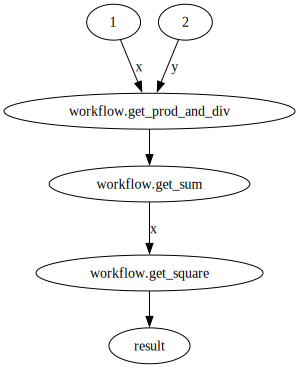

In [2]:
plot(file_name='workflow.json')

## Aiida 

In [3]:
from python_workflow_definition.aiida import load_workflow_json

from aiida import load_profile
load_profile()

Profile<uuid='3ce302a995914d2e8a7b6327a10fe381' name='pwd'>

In [4]:
workgraph = load_workflow_json(file_name='workflow.json')

In [5]:
# TODO: Create inputs rather than tasks out of data nodes
workgraph

NodeGraphWidget(settings={'minimap': True}, style={'width': '90%', 'height': '600px'}, value={'name': 'WorkGra…

In [6]:

workgraph.run()

05/24/2025 05:39:46 AM <644> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [35|WorkGraphEngine|continue_workgraph]: tasks ready to run: get_prod_and_div1
05/24/2025 05:39:46 AM <644> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [35|WorkGraphEngine|update_task_state]: Task: get_prod_and_div1, type: PyFunction, finished.
05/24/2025 05:39:46 AM <644> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [35|WorkGraphEngine|continue_workgraph]: tasks ready to run: get_sum2
05/24/2025 05:39:47 AM <644> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [35|WorkGraphEngine|update_task_state]: Task: get_sum2, type: PyFunction, finished.
05/24/2025 05:39:47 AM <644> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [35|WorkGraphEngine|continue_workgraph]: tasks ready to run: get_square3
05/24/2025 05:39:47 AM <644> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [35|WorkGraphEngine|updat

## executorlib

In [7]:
from executorlib import SingleNodeExecutor

In [8]:
from python_workflow_definition.executorlib import load_workflow_json

In [9]:
with SingleNodeExecutor(max_workers=1) as exe:
    result = load_workflow_json(file_name="workflow.json", exe=exe).result()

In [10]:
result

6.25

## Jobflow

In [11]:
from jobflow.managers.local import run_locally

In [12]:
from python_workflow_definition.jobflow import load_workflow_json

In [13]:
flow = load_workflow_json(file_name="workflow.json")

In [14]:
result = run_locally(flow)
result

2025-05-24 05:39:49,427 INFO Started executing jobs locally
2025-05-24 05:39:49,510 INFO Starting job - get_prod_and_div (f82f13df-44cc-4bce-8712-ab5a1408c551)
2025-05-24 05:39:49,512 INFO Finished job - get_prod_and_div (f82f13df-44cc-4bce-8712-ab5a1408c551)
2025-05-24 05:39:49,513 INFO Starting job - get_sum (bb1c3b6d-986a-4e5d-b2f4-6611940ba4c6)
2025-05-24 05:39:49,514 INFO Finished job - get_sum (bb1c3b6d-986a-4e5d-b2f4-6611940ba4c6)
2025-05-24 05:39:49,515 INFO Starting job - get_square (5c60ac07-39fd-4511-93d8-3bd65c6bd7ca)
2025-05-24 05:39:49,516 INFO Finished job - get_square (5c60ac07-39fd-4511-93d8-3bd65c6bd7ca)
2025-05-24 05:39:49,516 INFO Finished executing jobs locally


{'f82f13df-44cc-4bce-8712-ab5a1408c551': {1: Response(output={'prod': 2, 'div': 0.5}, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jovyan/example_workflows/arithmetic'))},
 'bb1c3b6d-986a-4e5d-b2f4-6611940ba4c6': {1: Response(output=2.5, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jovyan/example_workflows/arithmetic'))},
 '5c60ac07-39fd-4511-93d8-3bd65c6bd7ca': {1: Response(output=6.25, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jovyan/example_workflows/arithmetic'))}}

## pyiron

In [15]:
from python_workflow_definition.pyiron_base import load_workflow_json

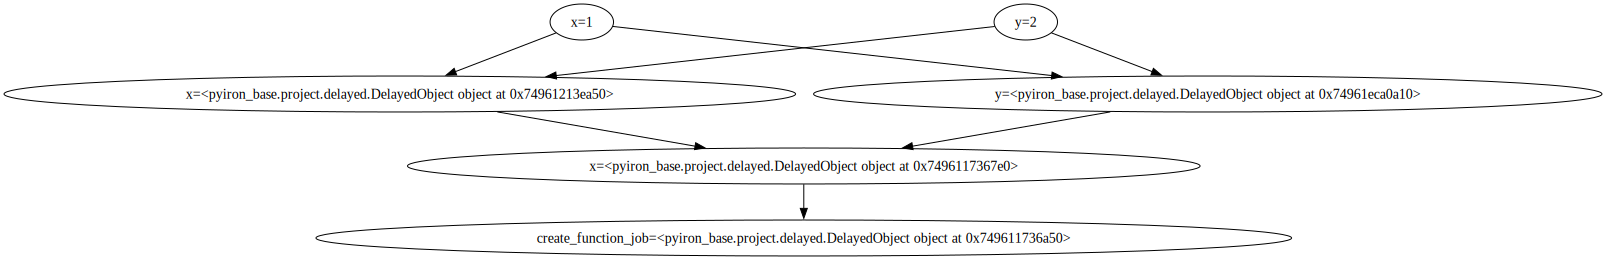

In [16]:
delayed_object_lst = load_workflow_json(file_name="workflow.json")
delayed_object_lst[-1].draw()

In [17]:
delayed_object_lst[-1].pull()

The job get_prod_and_div_00cf2c787390eacfbc4a51e9a0c38ec7 was saved and received the ID: 1
The job get_sum_4b5b9d16b259a13b6a32798ce2779af8 was saved and received the ID: 2
The job get_square_9cc2f0545498916d7720c59c1120a66d was saved and received the ID: 3


6.25

## Python

In [18]:
from python_workflow_definition.purepython import load_workflow_json

In [19]:
load_workflow_json(file_name="workflow.json")

6.25